In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import time
from scipy import interpolate as inp
from matplotlib.backends.backend_pdf import PdfPages

Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

In [4]:
xs = list(range(1, 11))

In [5]:
A = [random.random() for x in xs]

In [6]:
def langrangeInterpolation(xs, ys):
    def fun(x):
        result = 0
        if len(xs) != len(ys):
            raise Exception('Bad arguments!')
        n = len(xs)

        for i in range(0, n):
            value = ys[i]
            for j in range(0, n):
                if j != i:
                    value = value * (x - xs[j]) / (xs[i] - xs[j])
            result = result + value
        return result               
    return fun

In [7]:
fitLangrange = langrangeInterpolation(xs, A)

In [8]:
xsf = np.linspace(1,10, 901)

In [9]:
B = [fitLangrange(x) for x in xsf]

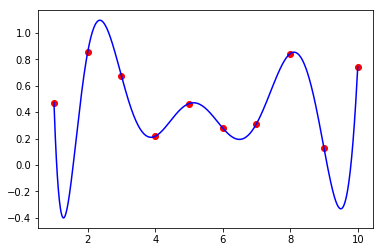

In [10]:
with PdfPages('langrange.pdf') as pdf:
    f, ax = plt.subplots(1)
    ax.scatter(xs, A, color="red")
    ax.plot(xsf, B, color="blue")
    pdf.savefig(f)

Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

In [11]:
def newtonInterpolation(xs, ys):
    a = []
    def fun(x):
        result = 0
        if len(xs) != len(ys):
            raise Exception('Bad arguments!')
        n = len(xs)
        
        a.append(ys[0])
        for k in range(1, n):
            denominator = 1
            for j in range(0, k):
                denominator = denominator * (xs[k] - xs[j])
            numerator = ys[k]
            sum1 = 0
            for i in range(0, k):
                tmp = 1
                for j in range(0, i):
                    tmp = tmp * (xs[k] - xs[j])
                sum1 = sum1 + a[i] * tmp
            numerator = numerator - sum1
            a.append(numerator/denominator)
        
        for i in range(0, n):
            prod = 1
            for j in range(0, i):
                prod = prod * (x - xs[j])
            result = result + a[i] * prod
        return result               
    return fun

In [12]:
fitNewton = newtonInterpolation(xs, A)

In [13]:
C = [fitNewton(x) for x in xsf]

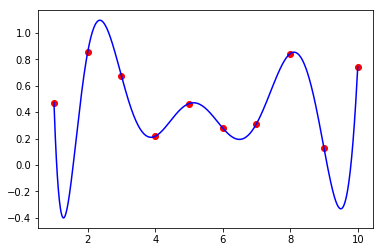

In [14]:
with PdfPages('newton.pdf') as pdf:
    f, ax = plt.subplots(1)
    ax.scatter(xs, A, color="red")
    ax.plot(xsf, B, color="blue")
    pdf.savefig(f)

Interpolacja wielomianowa z pakietu numpy

In [15]:
fitNumpy = np.poly1d(np.polyfit(xs, A, len(xs)-1))

In [16]:
D = [fitNumpy(x) for x in xsf]

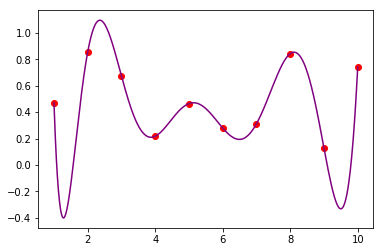

In [17]:
f, ax = plt.subplots(1)
ax.scatter(xs, A, color="red")
ax.plot(xsf, D, color="purple")

Wspólny wykres:

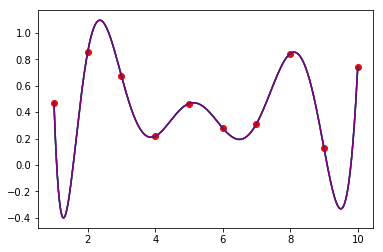

In [18]:
with PdfPages('allmethods.pdf') as pdf:
    f, ax = plt.subplots(1)
    ax.scatter(xs, A, color="red")
    ax.plot(xsf, B, color="blue")
    ax.plot(xsf, C, color="green")
    ax.plot(xsf, D, color="purple")
    pdf.savefig(f)

Wszystkie wykresy na siebie nachodzą, ponieważ zawsze istnieje dokładnie jeden wielomian interpolujący.

Pomiar czasu:

In [19]:
df = pd.DataFrame(columns=['n', 'type', 'time'])
print(df)

Empty DataFrame
Columns: [n, type, time]
Index: []


In [20]:
i = 5
while i <= 15:
    for j in range(0,10):
        xs = list(range(1, i+1))
        xsf = np.linspace(1, i+1, 100 * i + 1)
        A = [random.random() for x in xs]

        start = time.time()
        fitLangrange = langrangeInterpolation(xs, A)
        B = [fitLangrange(x) for x in xsf]
        end = time.time()
        timeLangrange = end - start
        df2 = pd.DataFrame([[i, 'langrange', timeLangrange]], 
                           columns=['n', 'type', 'time'])
        df = df.append(df2, ignore_index=True)

        start = time.time()
        fitNewton = newtonInterpolation(xs, A)
        C = [fitNewton(x) for x in xsf]
        end = time.time()
        timeNewton = end - start
        df2 = pd.DataFrame([[i, 'newton', timeNewton]], 
                           columns=['n', 'type', 'time'])
        df = df.append(df2, ignore_index=True)

        start = time.time()
        fitNumpy = np.poly1d(np.polyfit(xs, A, len(xs)-1))
        D = [fitNumpy(x) for x in xsf]
        end = time.time()
        timeNumpy = end - start
        df2 = pd.DataFrame([[i, 'numpy', timeNumpy]], 
                           columns=['n', 'type', 'time'])
        df = df.append(df2, ignore_index=True)

        
    i = i+1

In [21]:
df.to_csv('interpolation_time.csv')

Poeksperymentowac z interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane), narysowac wykresy i porownac z wykresami interpolacji wielomianowej.

1. Cubic Spline

In [22]:
xs = list(range(1,10))
A = [random.random() for x in xs]

In [23]:
xsf = np.linspace(1,10, 901)

In [24]:
fitSpline = inp.CubicSpline(xs, A)
fitNewton = newtonInterpolation(xs, A)

In [25]:
C = [fitSpline(x) for x in xsf]
D = [fitNewton(x) for x in xsf]

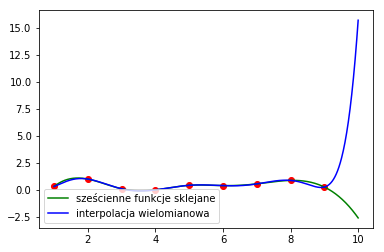

In [26]:
with PdfPages('cubic.pdf') as pdf:
    f, ax = plt.subplots(1)
    ax.scatter(xs, A, color="red")
    ax.plot(xsf, C, color="green", label='sześcienne funkcje sklejane')
    ax.plot(xsf, D, color="blue", label='interpolacja wielomianowa')
    plt.legend(loc='lower left')
    pdf.savefig(f)

2. BSpline, k = 2

In [27]:
fitBSpline = inp.BSpline(xs, A, 2)
fitNewton = newtonInterpolation(xs, A)

In [28]:
C = [fitBSpline(x) for x in xsf]
D = [fitNewton(x) for x in xsf]

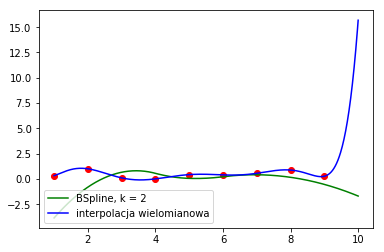

In [29]:
with PdfPages('bspline.pdf') as pdf:
    f, ax = plt.subplots(1)
    ax.scatter(xs, A, color="red")
    ax.plot(xsf, C, color="green", label='BSpline, k = 2')
    ax.plot(xsf, D, color="blue", label='interpolacja wielomianowa')
    plt.legend(loc='lower left')
    pdf.savefig(f)

Zademonstrować efekt Rungego:

In [30]:
xs = np.linspace(-1, 1, 11)

In [31]:
ys = [ 1/(1 + 25*x**2) for x in xs ]

In [32]:
xsf = np.linspace(-1, 1, 201)

In [33]:
fitNewton = newtonInterpolation(xs, ys)
C = [1 / (1 + 25*x**2) for x in xs]
D = [fitNewton(x) for x in xsf]
E = [1 / (1 + 25*x**2) for x in xsf]

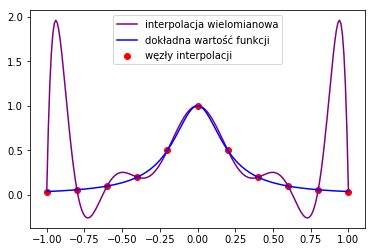

In [34]:
with PdfPages('runge.pdf') as pdf:
    f, ax = plt.subplots(1)
    ax.scatter(xs, C, color="red", label='węzły interpolacji')
    ax.plot(xsf, D, color="purple", label='interpolacja wielomianowa')
    ax.plot(xsf, E, color="blue", label='dokładna wartość funkcji')
    plt.legend(loc='upper center')
    pdf.savefig(f)

Zbadać i zademonstrować podczas zajęc rózne algorytmy interpolacji stosowane w grafice komputerowej (np. do zmiany wielkości obrazu). Można korzystac z gotowych rozwiazań, ale trzeba wiedzieć, jak te algorytmy dzialaja. Do zaliczenia tego zadania potrzebne jest demonstracja i porownanie działania conajmniej dwóch metod.

W grafice komputerowej interpolacja ma na celu utworzenie nowego, wcześniej nieistniejącego piksela na podstawie sąsiadujących pikseli.

In [2]:
import cv2

In [6]:
tree = cv2.imread("tree.jpg") #wymiary pliku 256x256

In [10]:
tree2 = cv2.resize(tree, dsize=(400, 400), interpolation=cv2.INTER_NEAREST)
cv2.imwrite("tree2.jpg", tree2)

True

In [15]:
tree3 = cv2.resize(tree, dsize=(400, 400), interpolation=cv2.INTER_LINEAR)
cv2.imwrite("tree3.jpg", tree3)

True